![SQL wallpaper](https://cdn.ttgtmedia.com/microsites/embinteluk/images/heroassetbackground.jpg)

image credit:https://www.computerweekly.com/ITT

# SQLAlchemy 

**As I examine the data, I am overcome with a creeping suspicion that the dataset is fake. I surmise that my boss handed me spurious data in order to test the data engineering skills of a new employee. To confirm my hunch, I decide to take the following steps to generate a visualization of the data, with which I shall confront my boss**

## Data Visualization

In [1]:
# Import the neccessary libraries
import matplotlib.pyplot as plt
import pandas as pd
!pip install psycopg2
from sqlalchemy import create_engine
# Import Username,Password and Database_name
from config import Username,Password,DBname
print("All neccessary libraries imported")

All neccessary libraries imported


### Create connection

In [2]:
# The create_engine() function produces an Engine object based on a URL
engine = create_engine('postgresql+psycopg2://'+ Username + ':' + Password + '@localhost:5432/' + DBname)
connection = engine.connect()

### Create dataframes from the tables in database

In [3]:
# Create departments dataframe from departments table in the database
departments_df = pd.read_sql("SELECT * FROM departments",connection)
# Create employees dataframe from employees table in the database
employees_df = pd.read_sql("SELECT * FROM employees",connection)
# Create salaries dataframe from salaries table in the database
salaries_df = pd.read_sql("SELECT * FROM salaries",connection)
# Create titles dataframe from titles table in the database
titles_df = pd.read_sql("SELECT * FROM titles",connection)
# Create managers dataframe from dept_manager table in the database
managers_df = pd.read_sql("SELECT * FROM dept_manager",connection)
# Create dept_employees dataframe from dept_emp table in the database
dept_emp_df = pd.read_sql("SELECT * FROM dept_emp",connection)

In [4]:
# Display the employees dataframe
print('\033[1m'+"The shape of the {} dataframe is: {}" .format("employees",employees_df.shape)+'\033[0m')
employees_df.head() # Display the first 5 rows of the dataframe

The shape of the employees dataframe is: (300024, 6)


,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [5]:
# Display the salaries dataframe
print('\033[1m'+"The shape of the {} dataframe is: {}" .format("salaries",salaries_df.shape)+'\033[0m')
salaries_df.head() # Display the first 5 rows of the dataframe

The shape of the salaries dataframe is: (300024, 4)


,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [6]:
# Display the departments dataframe
print('\033[1m'+"The shape of the {} dataframe is: {}" .format("departments",departments_df.shape)+'\033[0m')
departments_df.head() # Display the first 5 rows of the dataframe

The shape of the departments dataframe is: (9, 2)


,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development


In [7]:
# Display the titles dataframe
print('\033[1m'+"The shape of the {} dataframe is: {}" .format("titles",titles_df.shape)+'\033[0m')
titles_df.head() # Display the first 5 rows of the dataframe

The shape of the titles dataframe is: (443308, 4)


,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


## Histogram of salaries

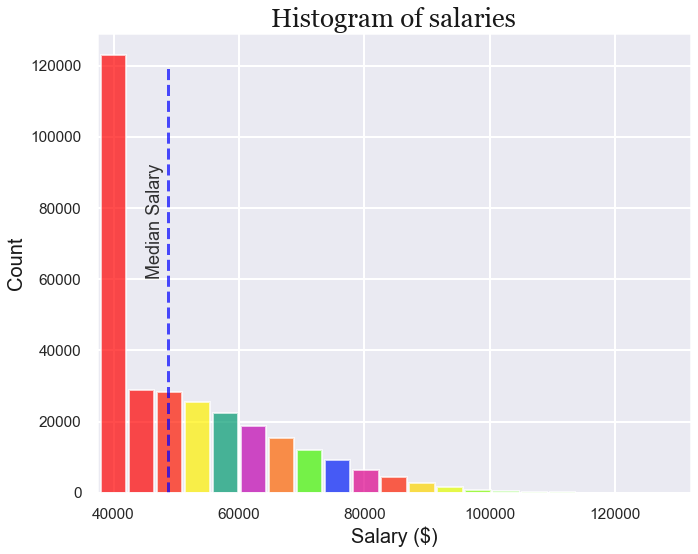

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
# Set the style for seaborn plot
sns.set_style("darkgrid")
# Create a font library
titlefont = {"fontname":"Georgia"}
labelfont = {"fontname":"Arial"}
# Set font scale and reduce grid line width
sns.set_context("poster",font_scale=0.7, rc={"grid.linewidth":2})
# Define the figure size
fig = plt.figure(figsize=(10,8))
# Define the number of bins
number_of_bins = 20
# Define the data
x = salaries_df["salary"]
# n is the count in each bin, bins is the lower-limit of the bin
n, bins, patches = plt.hist(x, bins=number_of_bins, align="left",alpha=0.7, rwidth = 0.9)
# let's color code by height of the bins
fracs = n / n.max()
# Normalizing the data for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())
# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.prism_r(norm(thisfrac))
    thispatch.set_facecolor(color)
# Creating padding for the x limits
x_pad = abs(0.05*x.mean()) # 10% of mean x value
# Sets the x limits of the current chart
plt.xlim(x.min()-x_pad,x.max()+x_pad)
# Defining the titles, x and y axes labels
plt.xlabel("Salary ($)",fontsize = 20,color="black",alpha=0.9,**labelfont)
plt.ylabel("Count",fontsize = 20,color="black",alpha=0.9,**labelfont)
plt.title("Histogram of salaries",fontsize=26,color="black",alpha=0.9,**titlefont)
# Display the median salary
plt.vlines(x.median(),0,120000,color="blue",alpha=0.7,linewidth=3,linestyle="dashed")
# Annotate text
plt.annotate("Median Salary",xy=(48000,60000),rotation = 90, fontsize=18,\
             va = "bottom", ha = "right",color = "black",alpha = 0.8, **labelfont)
# Tweak spacing to prevent clipping of ylabel
plt.tight_layout()
plt.savefig("Images/Salary_Histogram.png") # Save the plot
plt.show()  # Display the plot

# Bar chart of average salary by title

## Creating a combined dataframe using Pandas

In [9]:
# Let's copy the relevant columns from title dataframe
df_title = titles_df[["emp_no","title"]]
# Let's copy the relevant columns from salary dataframe
df_salary = salaries_df[["emp_no","salary"]]
# Let's create a combined dataframe by merging the above dataframes
df_combined = pd.merge(df_title,df_salary,how = "inner",left_on="emp_no",right_on="emp_no")
# Let's groupby salary column in combined dataframe by each title
grouped_salary = df_combined["salary"].groupby(df_combined["title"]) # Create a GroupBy object
# Let's create a dataframe with average salary for each title
average_salary = round(grouped_salary.mean(),2).to_frame("avg_salary").reset_index()
# Displae the average salary dataframe
average_salary

,title,avg_salary
0,Assistant Engineer,48493.20
1,Engineer,48539.78
2,Manager,51531.04
3,Senior Engineer,48506.75
4,Senior Staff,58503.29
5,Staff,58465.27
6,Technique Leader,48580.51


## Creating a combined dataframe using SQL

### Let's create the same dataframe using raw SQL commands querying the database

In [10]:
from sqlalchemy.sql import text
# Create the SQL query using text module
statement = text("""SELECT title AS title,
                           avg(salary) AS avg_salary 
                                FROM titles 
                                    INNER JOIN salaries 
                                        ON titles.emp_no = salaries.emp_no 
                                            GROUP BY title""")
# Executing the query and create a combined dataframe of salaries and titles
combined_df = pd.read_sql(statement,connection)
print('\033[1m'+"The shape of the {} dataframe is: {}" .format("combined",combined_df.shape)+'\033[0m')
combined_df

The shape of the combined dataframe is: (7, 2)


,title,avg_salary
0,Assistant Engineer,48493.204786
1,Engineer,48539.781423
2,Manager,51531.041667
3,Senior Engineer,48506.751806
4,Senior Staff,58503.286614
5,Staff,58465.271904
6,Technique Leader,48580.505772


## Visualizing average salary by title

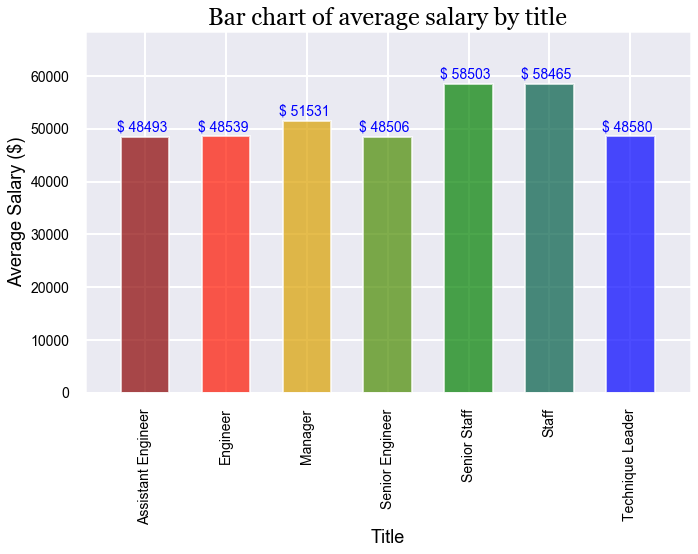

In [11]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
# Create a font library
titlefont = {"fontname":"Georgia"}
labelfont = {"fontname":"Arial"}
# Define the figure size
fig = plt.figure(figsize=(10,8))
# Define a color list
clist = [(0,"darkred"),(0.125,"red"),(0.25,"orange"),(0.5,"green"),(0.7,"green"),(0.75,"blue"),(1,"blue")]
rvb = mcolors.LinearSegmentedColormap.from_list("",clist)
# Define x_axis for the plot
x_axis = np.arange(len(combined_df["title"]))
# Define tick locations and place the x_ticks
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,combined_df["title"],rotation=90,color="black",fontsize=14,**labelfont)
plt.yticks(color="black",fontsize=14,**labelfont)
# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)
# Sets the y limits of the current chart
plt.ylim(0, max(combined_df["avg_salary"])+10000)
# Give our chart some labels and a tile
plt.title("Bar chart of average salary by title",fontsize=24,color="black",**titlefont)
plt.xlabel("Title",fontsize = 18,color="black",**labelfont)
plt.ylabel("Average Salary ($)",fontsize = 18,color="black",**labelfont)
# We apply align="center" to ensure our bars line up with our tick marks
plt.bar(x_axis, combined_df["avg_salary"], width = 0.6,color= rvb(x_axis/len(combined_df["title"])),alpha=0.7, align="center")
for index,value in enumerate(combined_df["avg_salary"]):
    # Create the labels
    label = "$ {}".format(int(value))
    # annotate text within each bar
    plt.annotate(label,xy=(index-0.35,value+1000),color = 'blue',fontsize=14,**labelfont)
# Ensure that the x_labels show in the plot
plt.tight_layout()
plt.savefig("Images/Average_Salary_Bar_Chart.png") # Save the plot
plt.show() # Display the plot

# Pie chart of male and female employees

### Let's create a gender dataframe using raw SQL commands querying the database

In [12]:
from sqlalchemy.sql import text
# Create the SQL query using text module
statement = text("""SELECT gender,count(*) AS No_of_employees 
                            FROM employees 
                                GROUP BY gender""")
# Executing the query and create a combined dataframe of salaries and titles
gender_df = pd.read_sql(statement,connection)
# Let's create a percentage column in the gender dataframe
gender_df["Percent Count"] = round(100*(gender_df["no_of_employees"]/gender_df["no_of_employees"].sum(axis=0)),2)
# Make the gender column as index
gender_df.set_index("gender",drop = True,inplace = True)
print('\033[1m'+"The shape of the {} dataframe is: {}" .format("gender",gender_df.shape)+'\033[0m')
gender_df

The shape of the gender dataframe is: (2, 2)


,no_of_employees,Percent Count
gender,,
F,120051,40.01
M,179973,59.99


### Visualizing the percentage of male and female employees

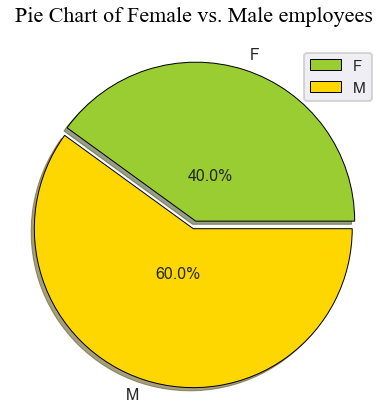

In [13]:
import matplotlib.pyplot as plt
# Create a font library
titlefont = {"fontname":"Times New Roman"}
labelfont = {"fontname":"Arial"}
# Let's make a colors list
colors_list = ["yellowgreen","gold"]
# Explode list for better visualization
explode_list=[0.05,0]
# Draw the pie chart
gender_df.plot(kind="pie", y="Percent Count",\
                  figsize = (6,6),\
                  autopct = "%1.1f%%",\
                  startangle = 0,\
                  pctdistance = 0.3,\
                  wedgeprops = {"edgecolor":"0","linewidth":1},\
                  colors = colors_list,\
                  explode = explode_list,\
                  textprops = {"fontsize":16},\
                  shadow = True)
# Display the title, legend and ensure that the pie chart is a circle
plt.title("Pie Chart of Female vs. Male employees", fontsize=22, color="black",y = 1.05,**titlefont)
plt.ylabel('') # Remove the y axis label
plt.legend(loc="best") # Place the legend
plt.axis("equal") # Make sure that the plot is a circle
plt.tight_layout()
plt.savefig("Images/Gender_Pie_Chart.png") # Save the plot
plt.show() # Display the plot

# Scatter plot of salary vs. employment years

### Let's create a combined dataframe of  salary, age and employment duration using raw SQL commands 

In [14]:
from sqlalchemy.sql import text
# Create the SQL query using text module
statement = text("""SELECT employees.emp_no AS employee_id,
                           EXTRACT(YEAR FROM age(hire_date)) AS employment_years,
                           EXTRACT(YEAR FROM age(birth_date)) AS age,
                           salary AS annual_salary
                                FROM employees 
                                    INNER JOIN 
                                        salaries ON employees.emp_no = salaries.emp_no""")
# Executing the query and create a combined dataframe of salaries and titles
salary_df = pd.read_sql(statement,connection)
print('\033[1m'+"The shape of the age-combined {} dataframe is: {}" .format("salary",salary_df.shape)+'\033[0m')
salary_df.head()

The shape of the age-combined salary dataframe is: (300024, 4)


,employee_id,employment_years,age,annual_salary
0,10005,30.0,65.0,78228
1,10010,30.0,57.0,72488
2,10011,30.0,66.0,42365
3,10018,33.0,66.0,55881
4,10035,31.0,67.0,41538


In [15]:
# Let's groupby salary column in age-combined dataframe by each employment_years
grouped_age_salary = salary_df["annual_salary"].groupby(salary_df["employment_years"]) # Create a GroupBy object
# Let's create a dataframe with median salary for each employment_years
# We select median salary because the median number is less likely skewed by outliers
age_salary = round(grouped_age_salary.median(),2).to_frame("average_salary").reset_index()
# Display the average salary dataframe
print('\033[1m'+"The shape of the age-combined {} dataframe is: {}" .format("median salary",age_salary.shape)+'\033[0m')
age_salary.head()

The shape of the age-combined median salary dataframe is: (16, 2)


,employment_years,average_salary
0,20.0,49018.0
1,21.0,48865.0
2,22.0,48351.0
3,23.0,48830.0
4,24.0,48856.0


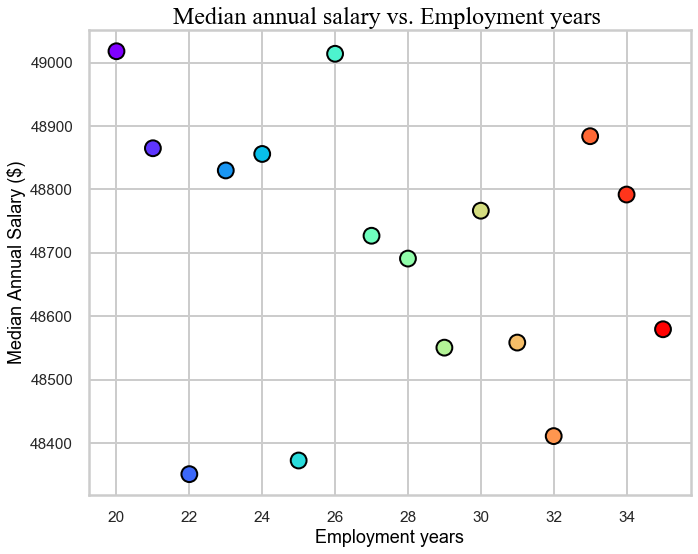

In [16]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
# Create a font library
titlefont = {"fontname":"Times New Roman"}
labelfont = {"fontname":"Arial"}
# Set the style for seaborn plot
sns.set_style("whitegrid")
# Set font scale and reduce grid line width
sns.set_context("poster",font_scale=0.7, rc={"grid.linewidth":2})
# Define the figure size
fig = plt.figure(figsize=(10,8))
# Make a color map
t = np.arange(len(age_salary["employment_years"]))
plt.scatter(x = age_salary["employment_years"],\
            y = age_salary["average_salary"],\
            edgecolor = "black",\
            s = 250,\
            c = t,\
            cmap = "rainbow")
# Display x & y-axis labels and a title for the scatterplot
plt.title("Median annual salary vs. Employment years ",fontsize=24,color="black",**titlefont)
plt.xlabel("Employment years",fontsize = 18,color="black",**labelfont)

plt.ylabel("Median Annual Salary ($)",fontsize = 18,color="black",**labelfont)
plt.tight_layout()
plt.savefig("Images/Median_Salary_vs_Employment_years.png") # Save the plot
plt.show() # Display the plot

# Box plot of salary for different titles

### Let's create a combined dataframe of  salary and employee titles using raw SQL commands 

In [17]:
from sqlalchemy.sql import text
# Create the SQL query using text module
statement = text("""SELECT titles.emp_no AS employee_id,
                           titles.title AS department_title,
                           salaries.salary AS annual_salary
                                FROM titles 
                                    INNER JOIN 
                                        salaries ON titles.emp_no = salaries.emp_no""")
# Executing the query and create a combined dataframe of salaries and titles
titles_df = pd.read_sql(statement,connection)
print('\033[1m'+"The shape of the salary-combined {} dataframe is: {}" .format("titles",titles_df.shape)+'\033[0m')
titles_df.head()

The shape of the salary-combined titles dataframe is: (443308, 3)


,employee_id,department_title,annual_salary
0,10005,Senior Staff,78228
1,10005,Staff,78228
2,10010,Engineer,72488
3,10011,Staff,42365
4,10018,Engineer,55881


### Creating a box plot of salaries for different employee titles

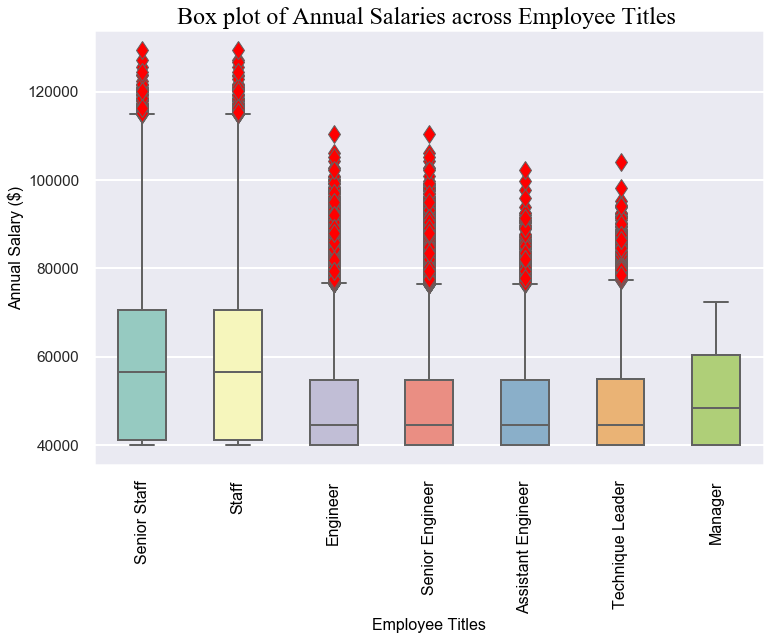

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a font library
titlefont = {"fontname":"Times New Roman"}
labelfont = {"fontname":"Arial"}
# Set the style for seaborn plot
sns.set_style("darkgrid")
# Set font scale and reduce grid line width
sns.set_context("poster",font_scale=0.7, rc={"grid.linewidth":2})
# Define the figure size
fig = plt.figure(figsize=(12,8))
# Adjust the display of outlier by setting flierprops
flierprops = dict(markerfacecolor="r",markersize=13,linestyle="none")
# Create the plot
sns.boxplot(x = titles_df["department_title"], \
            y = titles_df["annual_salary"],\
            width = 0.5,\
            palette = "Set3",\
            flierprops = flierprops,\
            linewidth = 2
           )
# Give our chart x & y-axis labels and a title
plt.title("Box plot of Annual Salaries across Employee Titles ",color = "black",fontsize=24,**titlefont)
plt.xlabel("Employee Titles",color = "black",fontsize = 16,**labelfont)
plt.xticks(rotation=90,color="black",fontsize=16,**labelfont)
plt.ylabel("Annual Salary ($)",color = "black",fontsize = 16,**labelfont)
plt.savefig("Images/Salary_Box_Plot.png") # Save the plot
plt.show() # Display the plot